In [1]:
import matplotlib.pyplot as plt
import matplotlib as plot
import pandas as pd
import numpy as np
import seaborn as sns
from rich import print, pretty
from rich.console import Console
from glob import glob
# from mpl_finance import candlestick_ohlc
import matplotlib.dates as plt_date
import pandas_datareader as pdr
from textblob import TextBlob
import tweepy
import webbrowser
from sklearn.linear_model import LinearRegression
import xlrd, itertools, re, os, math
import mplfinance as mpf
from datetime import datetime as dt
import matplotlib.animation as animation
import warnings, math
# plt.style.use(['science', 'notebook'])
warnings.simplefilter('ignore')

In [5]:
API_KEY="BqeRvYbu6STA4bMsuURjkAjJI"
API_SECRET_KEY="iZ6KM7LeGsfXmfB4Bi2qUbVmYM7aSQbgh5z0gUlMMYfSbdFlL2"
BEARER="AAAAAAAAAAAAAAAAAAAAAHFreAEAAAAAb%2FytsVC7eByXFBG2Ifk4l9YA1CA%3DoOxox4kVMA85E8A6O24OOJuHXI1TmQ2s7QQ7ToKvjBeWV6Oysn"
ACCESS_TOKEN="1378945133073334272-7bgD1L2Rp3S0aHljLt6rObmJF9bahE"
ACCESS_SECRET_TOKEN="OTWHAo030gQbGCAbv0x6VYn4C8XHVaLjOIHe3h6GCX7Bo"

In [9]:
client = tweepy.Client(bearer_token=BEARER)

user = client.get_user(username="MrTuriing")

# response = tweepy.Paginator(client.search_recent_tweets, query="#BTC OR #ETH", ).flatten(limit=20)
q ="IRAN #BTC OR #ETH"
response = client.search_recent_tweets(query="#BTC OR #ETH", max_results=10, user_fields=["profile_image_url"])

# for data in response.data:
#     print(data.author_id)
response2 = client.search_recent_tweets(query=q, user_fields=['profile_image_url', 'username'], 
    expansions=["author_id","referenced_tweets.id"], max_results=10)
result = {data.author_id : data.text.strip() for data in response2.data}
    
keys = list(result.keys())
main = [client.get_user(id=key) for key in keys]



ConnectTimeout: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /2/users/by/username/MrTuriing (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7fc5752a4cd0>, 'Connection to api.twitter.com timed out. (connect timeout=None)'))

In [ ]:
client = tweepy.Client(bearer_token = BEARER, wait_on_rate_limit=True)

q ="#BTC OR #ETH -is:retweet lang:en"
response2 = client.search_recent_tweets(query=q, user_fields=['profile_image_url', 'username'], expansions=["author_id"], max_results=10)
result = {data.author_id : data.text.strip() for data in response2.data}
users = [client.get_user(id=key) for key in list(result)]

usernames = [user.data.username for user in users]
tweets = list(result.values())

main_result = zip(usernames,tweets)
# rooms = Room.objects.all()	
ctx = {'tweets' : main_result}
for user,tw in main_result:
    print(user, tw, sep='\t')

In [ ]:
response2 = client.search_recent_tweets(query=q, user_fields=['profile_image_url', 'username'], expansions=["author_id"], max_results=10)
result = {data.author_id : data.text.strip() for data in response2.data}

users = [client.get_user(id=key) for key in list(result)]
usernames = [user.data.username for user in users]
tweets = list(result.values())

main_result = zip(usernames,tweets)
for data in main_result:
    print(data[0])

<center><h2> This is sample code NOT executable </h2></center>

In [ ]:
client = tweepy.Client(bearer_token=BEARER, wait_on_rate_limit=True)
query = "#BTC -has:media"
data = client.search_recent_tweets(query=query, expansions=['author_id'])


res = client.search_recent_tweets(query=query, user_fields=['profile_image_url'])

response = tweepy.Paginator(
    res, query=query, user_fields=['profile_image_url']).flatten(
        limit=1000)


def show_user_tweets(username):
    global user
    user = client.get_user(username=username, tweet_fields=["lang", "created_at"])
    tweets = client.get_users_tweets(id=user.data.id)
    for tweet in tweets:
        for tw in tweet:
            try:
                print(tw.text.strip(), tw.lang, sep='\n')
            except AttributeError:
                pass

# user's followers(the following process is like this)
def get_user_followers(username):
    user = client.get_user(username=username)
    followers = client.get_users_followers(user.data.id, user_fields=['profile_image_url'])
    result = {follower.name:follower.profile_image_url for follower in followers.data}
    return result


def get_retweeters_of_a_tweet(tweet_id):
    users = client.get_retweeters(id=id)
    result=[user.username for user in users]
    return result

def get_information_of_tweet(tweet_id):
    tweet = client.get_tweet(id=tweet_id)
    result = {tw.text:tw.author for tw in tweet.data}
    return result


def tweeting(message:str):
    global main_client
    main_client = tweepy.Client(
        consumer_key=API_KEY, consumer_secret=API_SECRET_KEY,
        access_token=ACCESS_TOKEN, access_token_secret=ACCESS_SECRET_TOKEN)

    result = main_client.create_tweet(
        direct_message_deep_link=message, poll_duration_minutes=60, poll_options=["Yes","No"])
    return result

def retweeting_tweet(tweet_id):
    result = client.retweet(id=tweet_id)
    return result

def replying(tweet_id, msg):
    result = client.create_tweet(in_reply_to_tweet_id=tweet_id, text=msg)
    return result


<h3> Researching Sentiments </h3>

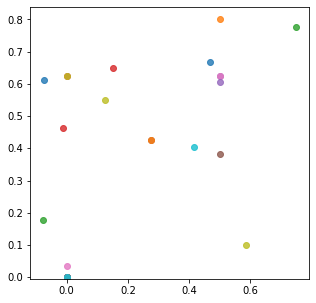

In [91]:
client = tweepy.Client(bearer_token=BEARER, wait_on_rate_limit=True)

query = "#BTC -is:retweet lang:en"

response = tweepy.Paginator(
    client.search_recent_tweets,
    query=query, user_fields=['username','description','location', 'public_metrics'],
    tweet_fields = ['created_at', 'geo', 'text', 'public_metrics'],
    expansions='author_id',
    max_results=10
).flatten(limit=30)

result = [res for res in response]
main = list(result)

analysis = [
    TextBlob(data.text.strip()).sentiment for data in main]

fig, ax = plt.subplots(figsize=(5,5))

polarity = analysis[0]
subjectivity = analysis[0][1]
for data in analysis:
    ax.scatter(x=data[0], y=data[1], alpha=.8)
plt.show()

In [7]:
client = tweepy.Client(bearer_token=BEARER)
q="#BTC"
response2 = client.search_recent_tweets(query=q, user_fields=['profile_image_url', 'username'], 
    expansions=["author_id","referenced_tweets.id"], max_results=10)

print(response2)

ConnectTimeout: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /2/tweets/search/recent?user.fields=profile_image_url%2Cusername&expansions=author_id%2Creferenced_tweets.id&max_results=10&query=%23BTC (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7f1b453cc850>, 'Connection to api.twitter.com timed out. (connect timeout=None)'))